In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import cv2 as cv

#Data Loading and Preprocessing

In [ ]:
happy_folder = "/content/drive/MyDrive/dataSetAnimalExpression/happy"
angry_folder = "/content/drive/MyDrive/dataSetAnimalExpression/Angry"
sad_folder = "/content/drive/MyDrive/dataSetAnimalExpression/Sad"

In [ ]:
def load_picture_folder(folder_path: str)->list:
  pictures_preprocessed = []
  for filename in os.listdir(folder_path):
    try:
      path_pictures = os.path.join(folder_path,filename)
      pictures = cv.imread(path_pictures, cv.IMREAD_GRAYSCALE)
      if pictures is not None:
        pictures = cv.resize(pictures,(40,40))
        pictures_preprocessed.append(pictures)
    except:
      raise Exception("File not found")
  return pictures_preprocessed


In [ ]:
happy_pictures = load_picture_folder(happy_folder)
angry_pictures = load_picture_folder(angry_folder)
sad_pictures = load_picture_folder(sad_folder)

In [ ]:
print(happy_pictures[1])

[[ 55  61  58 ...  22  21  23]
 [ 56  61  58 ...  19  18  18]
 [ 54  57  52 ...  21  19  18]
 ...
 [ 20  20  19 ... 134 135 141]
 [ 22  22  21 ... 129 124 111]
 [ 27  24  22 ... 128  94  14]]


Loading the pictures

In [ ]:
def encoding_label(list_pictures: list, number_to_encode: int)->list:
  try:
    label = [number_to_encode] * len(list_pictures)
  except:
    raise Exception("list_pictures must be a list, number to encode an int")
  return label

Create a label

In [ ]:
#Creating and Encoding a label
happy_label = encoding_label(happy_pictures, 0)
angry_label = encoding_label(angry_pictures,1)
sad_label = encoding_label(sad_pictures,2)

In [ ]:
y = np.array(happy_label + angry_label + sad_label)
x = np.array(happy_pictures + angry_pictures + sad_pictures)
x = x.astype("float32")/255.0
n_value = np.max(y) + 1
y = np.eye(n_value)[y]
print(y[600])

[0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state = 42)

In [ ]:
print("Type de X_train:", type(X_train))
print("Type de X_test:", type(X_test))
print("Type de y_train:", type(y_train))
print("Type de y_test:", type(y_test))
print(X_train.shape)

Type de X_train: <class 'numpy.ndarray'>
Type de X_test: <class 'numpy.ndarray'>
Type de y_train: <class 'numpy.ndarray'>
Type de y_test: <class 'numpy.ndarray'>
(600, 40, 40)


In [ ]:
dp = 0.2
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(Conv2D(32,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(Conv2D(64,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(128,(3,3), input_shape = (40,40,1), padding="same", activation ="relu",kernel_initializer = "random_uniform"))
model.add(Conv2D(128,(3,3), input_shape = (40,40,1), padding="same", activation ="relu",kernel_initializer = "random_uniform"))
model.add(Conv2D(128,(3,3), input_shape = (40,40,1), padding="same", activation ="relu",kernel_initializer = "random_uniform"))
model.add(MaxPooling2D(3,3))
model.add(Dropout(dp))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                   

In [ ]:
optimizer = optimizers.SGD(learning_rate=0.0001, momentum = 0.95)
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,40,40,1), y_train, epochs=300, verbose=2, validation_data = (X_test.reshape(-1,40,40,1),y_test))
loss, accuracy = model.evaluate(X_test.reshape(-1,40,40,1), y_test)
losstr, accuracytr = model.evaluate(X_train.reshape(-1,40,40,1), y_train)
print("accuracy test: ", accuracy*100)
print("accuracy training: ", accuracytr*100)

Epoch 1/300
19/19 - 12s - loss: 1.0986 - accuracy: 0.3450 - val_loss: 1.0986 - val_accuracy: 0.2867 - 12s/epoch - 628ms/step
Epoch 2/300
19/19 - 0s - loss: 1.0986 - accuracy: 0.3433 - val_loss: 1.0987 - val_accuracy: 0.2867 - 158ms/epoch - 8ms/step
Epoch 3/300
19/19 - 0s - loss: 1.0986 - accuracy: 0.3450 - val_loss: 1.0987 - val_accuracy: 0.2867 - 157ms/epoch - 8ms/step
Epoch 4/300
19/19 - 0s - loss: 1.0986 - accuracy: 0.3450 - val_loss: 1.0988 - val_accuracy: 0.2867 - 163ms/epoch - 9ms/step
Epoch 5/300
19/19 - 0s - loss: 1.0985 - accuracy: 0.3450 - val_loss: 1.0988 - val_accuracy: 0.2867 - 212ms/epoch - 11ms/step
Epoch 6/300
19/19 - 0s - loss: 1.0985 - accuracy: 0.3450 - val_loss: 1.0989 - val_accuracy: 0.2867 - 188ms/epoch - 10ms/step
Epoch 7/300
19/19 - 0s - loss: 1.0985 - accuracy: 0.3450 - val_loss: 1.0989 - val_accuracy: 0.2867 - 210ms/epoch - 11ms/step
Epoch 8/300
19/19 - 0s - loss: 1.0985 - accuracy: 0.3450 - val_loss: 1.0990 - val_accuracy: 0.2867 - 213ms/epoch - 11ms/step
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


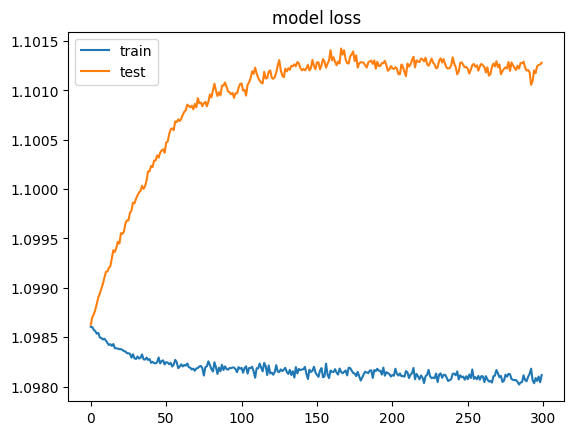

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


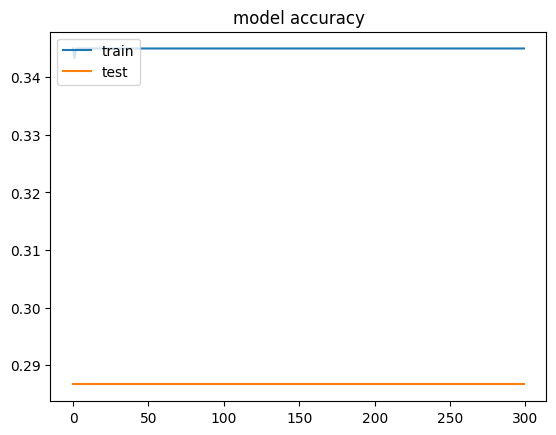

In [ ]:
print(history.history.keys())
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","test"], loc="upper left")
plt.title("model loss")
plt.show()
print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train","test"], loc="upper left")
plt.title("model accuracy")
plt.show()


In [ ]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(40, 40, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

print(model.summary())
# Compile the model with class weights
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 38, 38, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 38, 38, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_8 (Conv2D)           (None, 36, 36, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
# Calculate class weights
total_samples = len(y_train)
class_weights = {0: total_samples / np.sum(y_train[:, 0]),
                 1: total_samples / np.sum(y_train[:, 1]),
                 2: total_samples / np.sum(y_train[:, 2])}
# Train the model with class weights
history = model.fit(X_train.reshape(-1, 40, 40, 1), y_train, batch_size=32, epochs=100, validation_split=0.1, class_weight=class_weights,verbose=0)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test.reshape(-1, 40, 40, 1), y_test)
losstr, accuracytr = model.evaluate(X_train.reshape(-1, 40, 40, 1), y_train)


19/19 [==============================] - 0s 16ms/step - loss: 0.2967 - accuracy: 0.9483


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


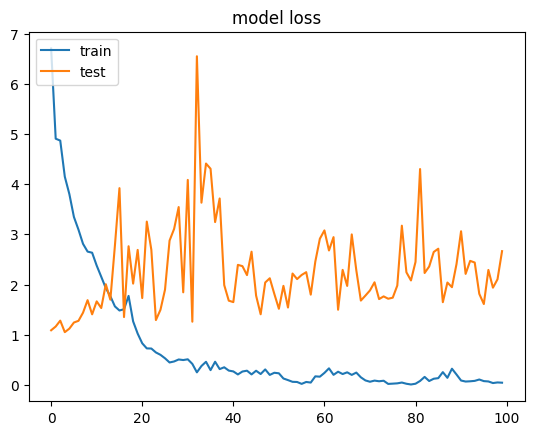

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


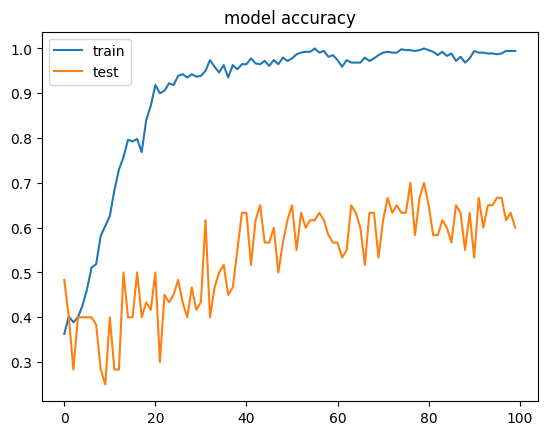

In [ ]:
print(history.history.keys())
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","test"], loc="upper left")
plt.title("model loss")
plt.show()
print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train","test"], loc="upper left")
plt.title("model accuracy")
plt.show()

In [ ]:
dp = 0.2
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(128,(3,3), input_shape = (40,40,1), padding="same", activation ="relu",kernel_initializer = "random_uniform"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), input_shape = (40,40,1), padding="same", activation ="relu",kernel_initializer = "random_uniform"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), input_shape = (40,40,1), padding="same", activation ="relu",kernel_initializer = "random_uniform"))
model.add(MaxPooling2D(3,3))
model.add(Dropout(dp))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 40, 40, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 40, 40, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 40, 40, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 13, 13, 64)       

In [ ]:
# Calculate class weights
total_samples = len(y_train)
class_weights = {0: total_samples / np.sum(y_train[:, 0]),
                 1: total_samples / np.sum(y_train[:, 1]),
                 2: total_samples / np.sum(y_train[:, 2])}
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,40,40,1), y_train, epochs=300, verbose=2, validation_data = (X_test.reshape(-1,40,40,1),y_test), class_weight=class_weights)
loss, accuracy = model.evaluate(X_test.reshape(-1,40,40,1), y_test)
losstr, accuracytr = model.evaluate(X_train.reshape(-1,40,40,1), y_train)
print("accuracy test: ", accuracy*100)
print("accuracy training: ", accuracytr*100)

Epoch 1/300
19/19 - 5s - loss: 3.6401 - accuracy: 0.3783 - val_loss: 1.0987 - val_accuracy: 0.3667 - 5s/epoch - 256ms/step
Epoch 2/300
19/19 - 0s - loss: 2.7007 - accuracy: 0.5650 - val_loss: 1.0997 - val_accuracy: 0.3667 - 207ms/epoch - 11ms/step
Epoch 3/300
19/19 - 0s - loss: 2.2684 - accuracy: 0.7000 - val_loss: 1.1000 - val_accuracy: 0.3667 - 214ms/epoch - 11ms/step
Epoch 4/300
19/19 - 0s - loss: 1.9568 - accuracy: 0.7683 - val_loss: 1.1028 - val_accuracy: 0.3667 - 193ms/epoch - 10ms/step
Epoch 5/300
19/19 - 0s - loss: 1.5981 - accuracy: 0.8433 - val_loss: 1.1059 - val_accuracy: 0.3667 - 185ms/epoch - 10ms/step
Epoch 6/300
19/19 - 0s - loss: 1.3410 - accuracy: 0.8783 - val_loss: 1.1057 - val_accuracy: 0.3667 - 184ms/epoch - 10ms/step
Epoch 7/300
19/19 - 0s - loss: 1.1142 - accuracy: 0.9267 - val_loss: 1.1124 - val_accuracy: 0.3667 - 186ms/epoch - 10ms/step
Epoch 8/300
19/19 - 0s - loss: 0.9079 - accuracy: 0.9450 - val_loss: 1.1220 - val_accuracy: 0.3667 - 191ms/epoch - 10ms/step
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


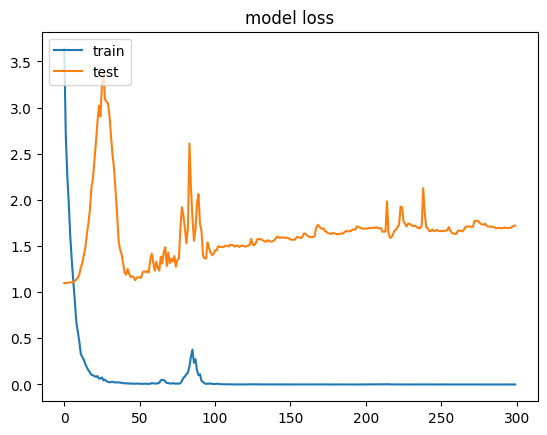

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


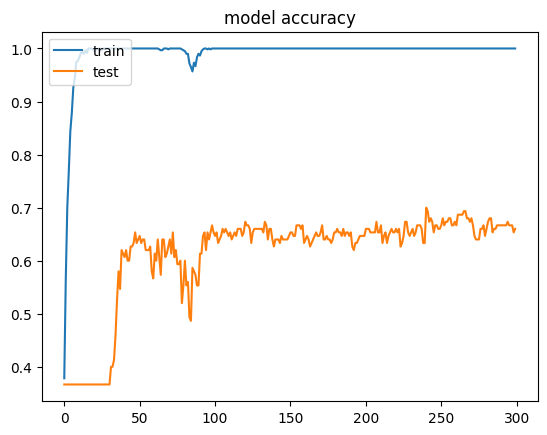

In [ ]:
print(history.history.keys())
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","test"], loc="upper left")
plt.title("model loss")
plt.show()
print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train","test"], loc="upper left")
plt.title("model accuracy")
plt.show()

In [ ]:
dp = 0.5
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), input_shape = (40,40,1), padding="same", activation ="relu", kernel_initializer = "random_uniform"))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(128,(3,3), input_shape = (40,40,1), padding="same", activation ="relu",kernel_initializer = "random_uniform"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), input_shape = (40,40,1), padding="same", activation ="relu",kernel_initializer = "random_uniform"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), input_shape = (40,40,1), padding="same", activation ="relu",kernel_initializer = "random_uniform"))
model.add(MaxPooling2D(3,3))
model.add(Dropout(dp))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 40, 40, 32)        320       
                                                                 
 batch_normalization_7 (Bat  (None, 40, 40, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 40, 40, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_8 (Bat  (None, 13, 13, 64)       

In [ ]:
# Calculate class weights
total_samples = len(y_train)
class_weights = {0: total_samples / np.sum(y_train[:, 0]),
                 1: total_samples / np.sum(y_train[:, 1]),
                 2: total_samples / np.sum(y_train[:, 2])}
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
history = model.fit(X_train.reshape(-1,40,40,1), y_train, epochs=200, verbose=2, validation_data = (X_test.reshape(-1,40,40,1),y_test), class_weight=class_weights)
loss, accuracy = model.evaluate(X_test.reshape(-1,40,40,1), y_test)
losstr, accuracytr = model.evaluate(X_train.reshape(-1,40,40,1), y_train)
model.save("Emotion")
print("accuracy test: ", accuracy*100)
print("accuracy training: ", accuracytr*100)

Epoch 1/200
19/19 - 5s - loss: 4.0583 - accuracy: 0.3367 - val_loss: 1.0998 - val_accuracy: 0.2867 - 5s/epoch - 244ms/step
Epoch 2/200
19/19 - 0s - loss: 3.5248 - accuracy: 0.4233 - val_loss: 1.1023 - val_accuracy: 0.3667 - 218ms/epoch - 11ms/step
Epoch 3/200
19/19 - 0s - loss: 3.2214 - accuracy: 0.4933 - val_loss: 1.1070 - val_accuracy: 0.3667 - 206ms/epoch - 11ms/step
Epoch 4/200
19/19 - 0s - loss: 3.0317 - accuracy: 0.5150 - val_loss: 1.1169 - val_accuracy: 0.3667 - 192ms/epoch - 10ms/step
Epoch 5/200
19/19 - 0s - loss: 2.7432 - accuracy: 0.5683 - val_loss: 1.1285 - val_accuracy: 0.3667 - 194ms/epoch - 10ms/step
Epoch 6/200
19/19 - 0s - loss: 2.6690 - accuracy: 0.5783 - val_loss: 1.1372 - val_accuracy: 0.2867 - 273ms/epoch - 14ms/step
Epoch 7/200
19/19 - 0s - loss: 2.3489 - accuracy: 0.6550 - val_loss: 1.1512 - val_accuracy: 0.2867 - 235ms/epoch - 12ms/step
Epoch 8/200
19/19 - 0s - loss: 2.2153 - accuracy: 0.6933 - val_loss: 1.1739 - val_accuracy: 0.3667 - 275ms/epoch - 14ms/step
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


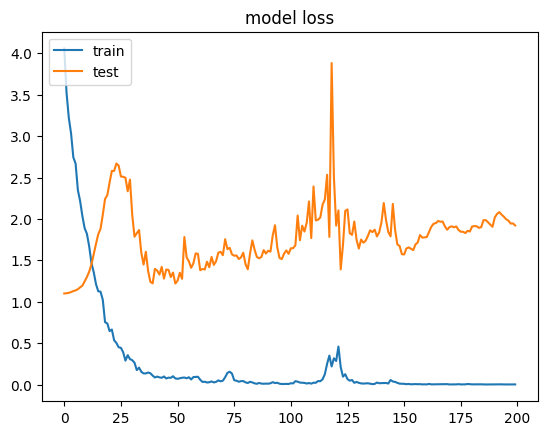

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


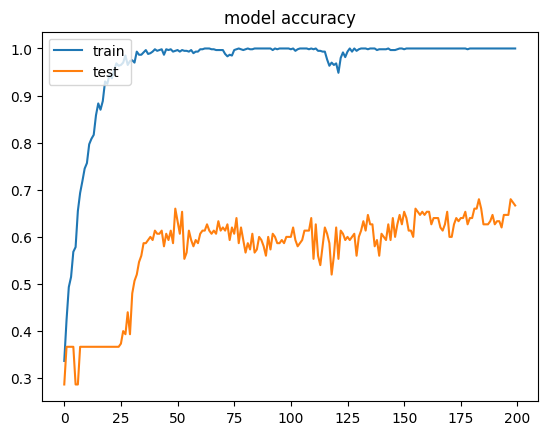

In [ ]:

print(history.history.keys())
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","test"], loc="upper left")
plt.title("model loss")
plt.show()
print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train","test"], loc="upper left")
plt.title("model accuracy")
plt.show()

HYPERPARAMETER TUNING

In [ ]:
import keras_tuner
